# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 6. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов
* Задача 2 &mdash; 70 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 30 балла


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов.

**2.** Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$.

**3.** Пусть $\mathsf{E}\varepsilon_i = 0$, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{E}\widehat{\theta}$ и $\mathsf{E}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.

**4.** Пусть $\mathsf{E}\varepsilon_i = 0$ и $\mathsf{D}\varepsilon_i = \sigma^2$, причем все $\varepsilon_i$ независимы, а $x \in \mathbb{R}$ &mdash; новый объект. Посчитайте $\mathsf{D}\widehat{\theta}$ и $\mathsf{D}\widehat{y}(x)$, где $\widehat{y}(x) = \widehat{\theta} x$.



*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. Формулами мат. ожидания и дисперсии с занятия пользоваться нельзя, но стоит сверить ответ.
2. **Прочитай требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

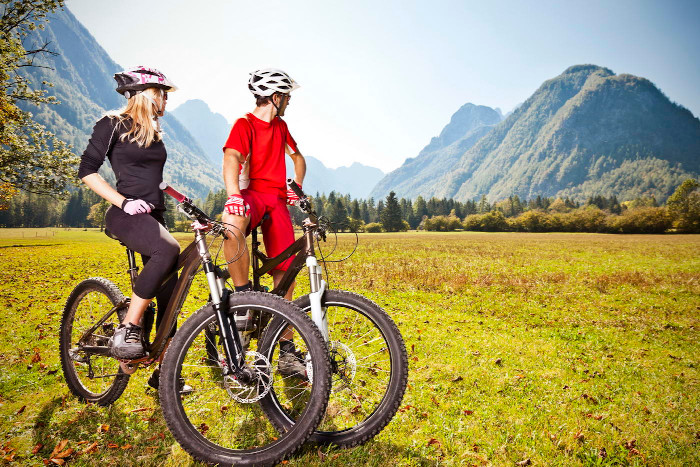

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [3]:
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  2011-01-09       1   0     1        0        0           0   
9       10  2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
5           1  0.204348  0.233209  0.518261   0.089565      88        1518   
6           2  0.196522  0.208839  0.498696   0.168726     148        1362   
7           2  0.165000  0.162254  0.535833   0.266804      68         891   
8           1  0.138333  0.116175  0.434167   0.361950      54         768   
9           1  0.150833  0.150888  0.482917   0.223267      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [4]:
train, test = train_test_split(bike_sharing_df, test_size=0.2)
train.shape, test.shape

((584, 16), (147, 16))

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. 

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

In [5]:
categorial_features = ['workingday', 'weathersit', 'season', 'weekday', 'mnth']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']# вещественные признаки
target_feature = 'cnt'  # целевой признак

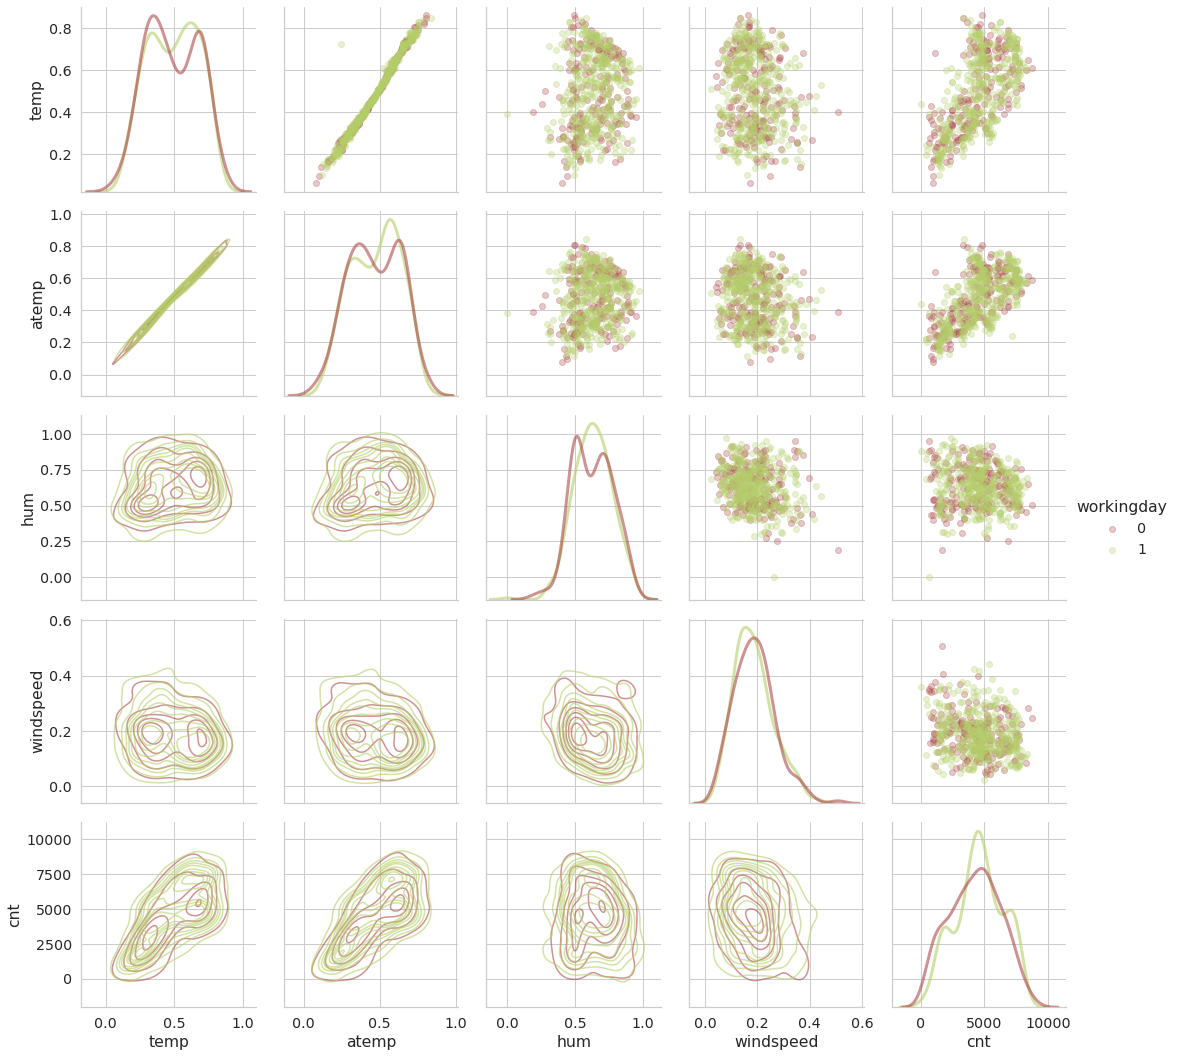

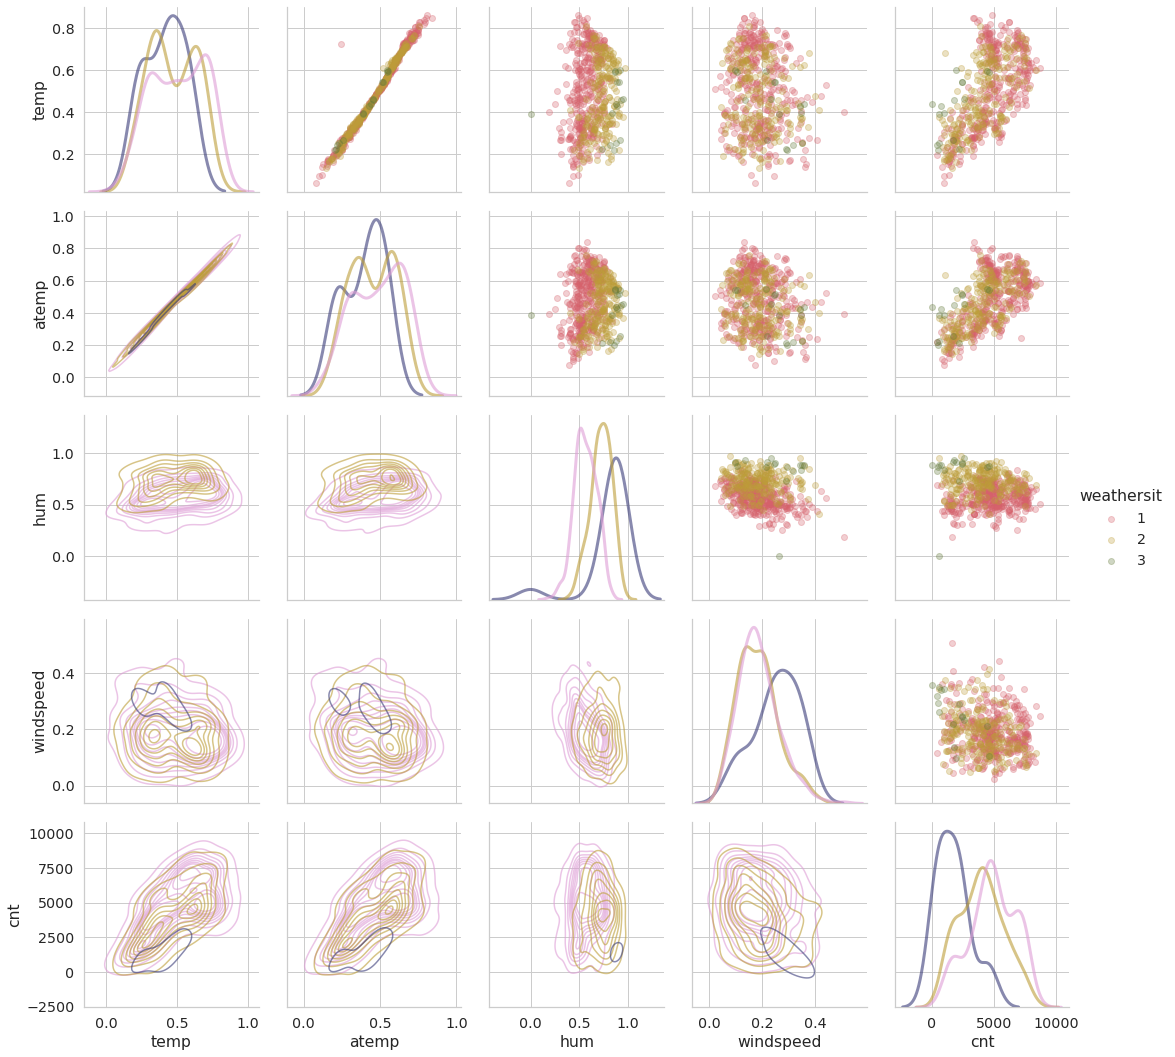

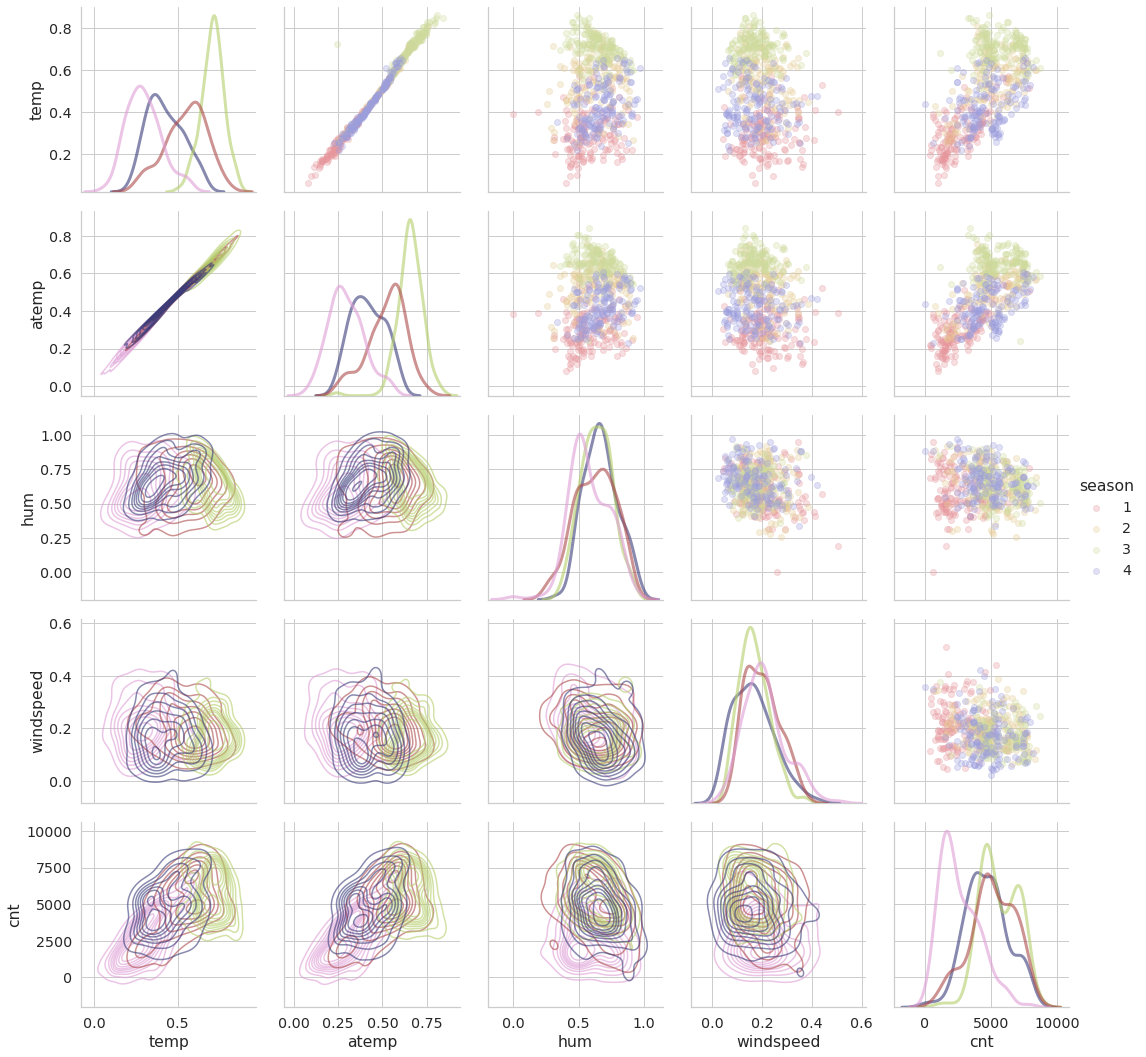

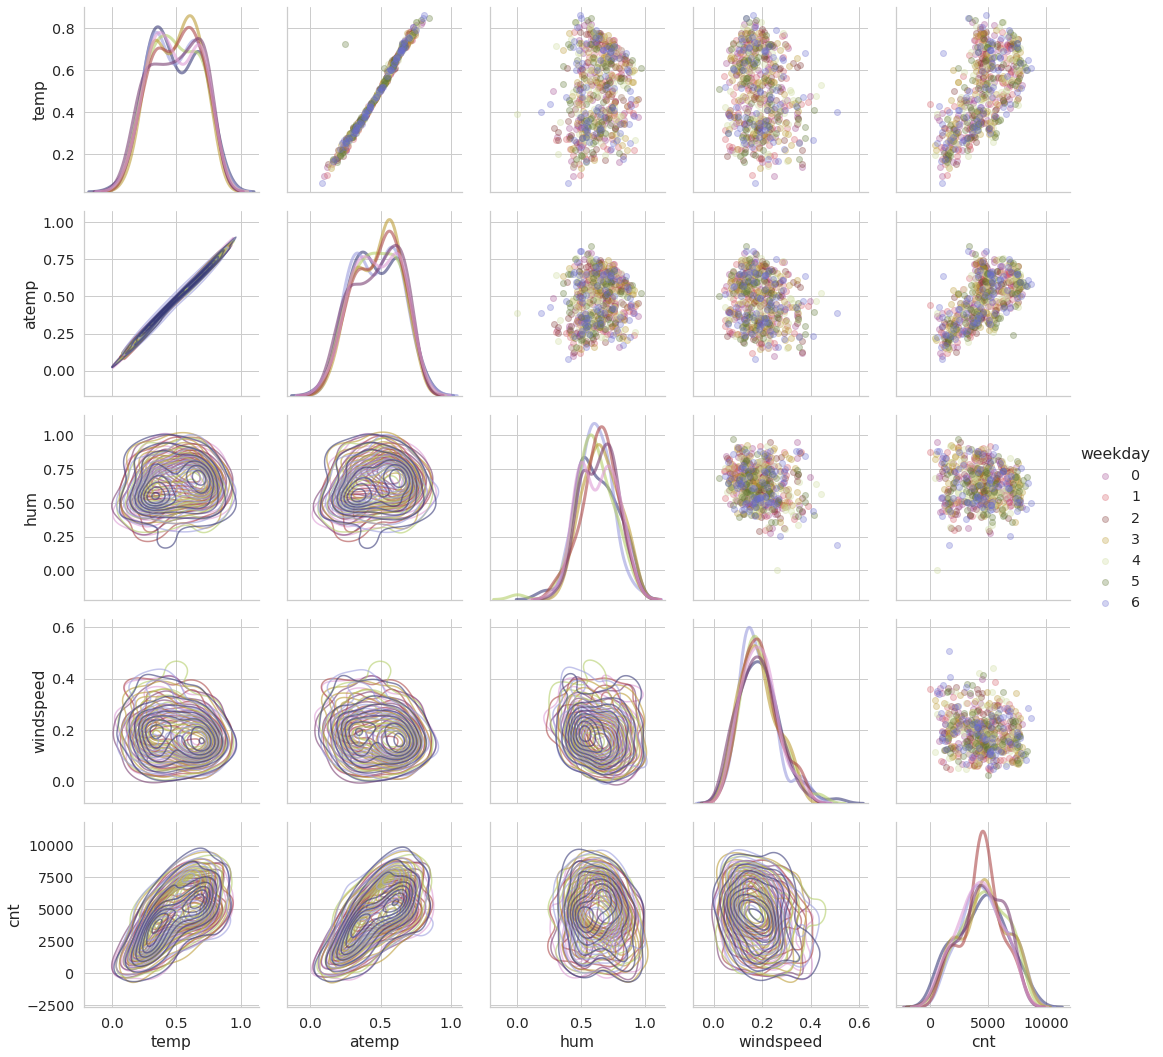

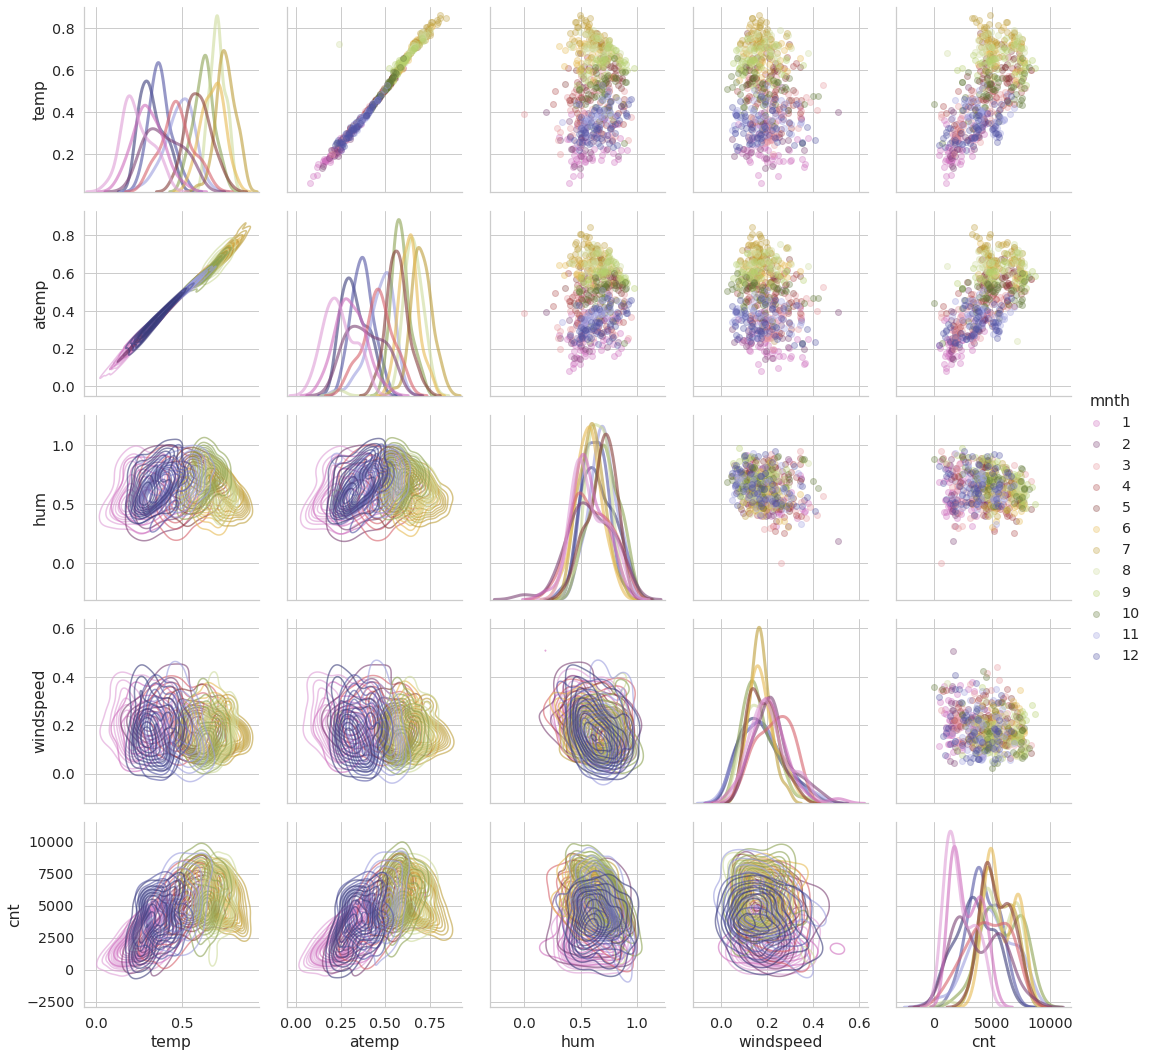

In [6]:
for hue in categorial_features:
    g = sns.PairGrid(train[['temp', 'atemp', 'hum', 'windspeed', 'cnt', hue]], 
                     hue=hue, diag_sharey=False, height=3, palette="tab20b_r")
    
    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6, 
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании
    
    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**
На построенных графиках выбросов практически не наблюдается, присутствуют в небольшом количестве в признаках скорость ветра и влажность.\
Если смотреть графики с осью y=cnt, то можно увидеть, что функция, лучше всего описывающая отношение по данным параметрам - линейная, а значит, рассматривать нелинейные функции от признаков не имеет смысла.\
1). С увеличением температуры(температуры по ощущениям), количество велосипедов, взятых напрокат, увеличивается\
2). С повышением скорости ветра и влажности, количество велосипедов, взятых напрокат, уменьшается\
3). Чем благоприятнее погода, тем больше велосипедов в прокате

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще.

**Процедура предобработки данных:**

**1.** Уберем выбросы в категориях скорость ветра и влажность;\
**2.** Меняем категориальные признаки на набор бинарных

Реализуйте данную процедуру.

In [7]:
train = train[train['hum'] > 0.25]
train = train[train['windspeed'] < 0.5]

In [8]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
encoder.categories_

[array([0, 1]),
 array([1, 2, 3]),
 array([1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])]

In [10]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(582, 27)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов.

In [11]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

model.coef_

array([ 5.78679287e+03,  1.20843282e+03, -2.95266783e+03, -2.71779348e+03,
        8.00300010e+02, -3.20356354e+02, -1.71829314e+03,  9.70453767e+02,
        9.02771065e+02,  1.63904747e+03, -4.22714973e+02, -6.10479383e+02,
       -4.19582613e+02, -4.46868087e+02, -3.36753998e+02,  3.26933538e+02,
        1.18186699e+02,  3.51839009e+02, -3.05806986e+01,  4.90361116e+00,
       -5.94982326e+02, -1.34930669e+03, -6.90536732e+02,  1.07150971e+02,
       -1.65127704e+02, -5.18784325e+02, -1.61304417e+02])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [12]:
test = test[test['hum'] > 0.25]
test = test[test['windspeed'] < 0.5]

In [13]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [14]:
test_preds = model.predict(X_test)

In [16]:
metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5, \
metrics.mean_absolute_error(test[target_feature], test_preds), \
metrics.mean_absolute_percentage_error(test[target_feature], test_preds)

(1358.7943738252495, 1204.234373820049, 0.3336873973506637)

RMSE, MAE, MAPE

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [140]:
#np.dot(np.dot(np.linalg.inv(np.dot(X_test.T, X_test)), X_test.T), test[target_feature])
np.linalg.inv(np.dot(X_test.T, X_test)).astype(int)

array([[ 50, -54,   1,   0,   0,   0,  -1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  -1,  -1,  -1,  -1,   0,   0,
          0],
       [-54,  59,  -2,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  1,  -2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [ -1,   1,   0,   0,   0,   0,   

In [20]:
np.dot(np.dot(np.linalg.inv(np.dot(X_test.T, X_test)), X_test.T), test[target_feature])

array([ 4402.52757791,  4870.72950243, -2680.17518561, -3093.21125573,
         184.04495852,   -76.59557079, -2775.38939273,    75.35048853,
        -709.05735714,   887.80626251,  -178.99996804,   779.17738442,
         647.64335236,   348.9445477 ,   311.44327138,  1177.99932206,
        1291.99341373,  1079.95424636,  1752.80637976,  1534.95930736,
        1211.67243878,  1365.91807744,  1671.86130207,  3223.24690368,
        2391.16395943,  2260.33882177,  1626.74504851])

Получается плохо обусловленная матрица, у которой обратная - почти нулевая. Можно выбросить некоторые признаки, вроде температуры по ощущениям, поскольку есть температура 

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [26]:
categorial_features = ['workingday', 'weathersit', 'weekday', 'mnth']  # категориальные признаки
real_features = ['temp', 'hum', 'windspeed']# вещественные признаки
target_feature = 'cnt'  # целевой признак

In [27]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])

In [28]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

In [29]:
np.dot(np.dot(np.linalg.inv(np.dot(X_test.T, X_test)), X_test.T), test[target_feature])

array([ 8612.88063361, -2384.30833932, -3421.81692724,   191.95161822,
        -136.53412875, -2917.87573735,  -133.89802955,   805.91435188,
         703.45106225,   335.0322252 ,   285.1481485 ,  1253.06645787,
        1363.82986307,  1177.40578704,  1984.03079615,  1690.38378195,
        1043.42249647,   744.63311391,  1022.48011367,  2789.30310169,
        3382.92988526,  3232.7635512 ,  2372.57531396])

In [30]:
test_preds = model.predict(X_test)

metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5, \
metrics.mean_absolute_error(test[target_feature], test_preds), \
metrics.mean_absolute_percentage_error(test[target_feature], test_preds)

(1359.2410731993807, 1187.898388713405, 0.32505110876754356)

У нас уменьшились показания MAE и MAPE, убрав atemp, фактически линейно зависящий от temp, а также season

Сделайте выводы.

**Выводы:**
При попытки обучить регрессию, нужно убрать выбросы в наших данных, оценить зависимость целевого признака от остальных признаков.\
При обучении регрессии, нужно избегать сильно зависящих друг от друга признаков, потому что они порождают вырожденную матрицу, в следствии которой увеличевается погрешность предсказаний.

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии. Не забудьте указать, как получается батч.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2.

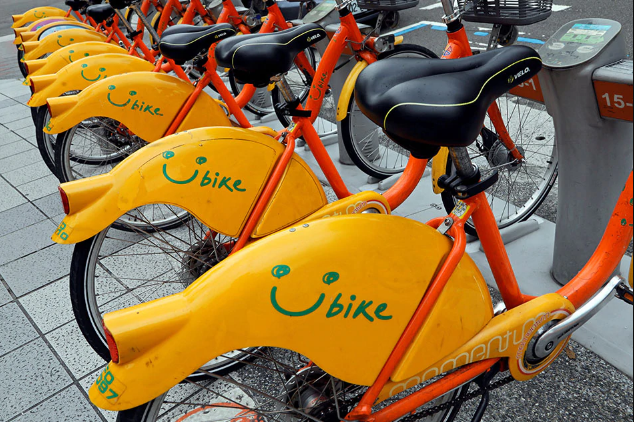

Для начала реализуйте класс для работы с моделью ridge-регрессии. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [273]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''
        self.lambd = lambd
        self.fit_intercept = fit_intercept
        
        
    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        self.tetta = np.linalg.inv(X.T.dot(X) + np.eye(X.shape[1]) * self.lambd).dot(X.T).dot(Y)
        return self
    
    
    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''
        predictions = X.dot(self.tetta)
        
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

In [274]:
train, test = train_test_split(bike_sharing_df, test_size=0.4)
valid, test = train_test_split(test, test_size=0.5)
train.shape, valid.shape, test.shape

((438, 16), (146, 16), (147, 16))

Выполните необходимые преобразования признаков. Не забудьте, что обучить преобразования нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее.

In [275]:
categorial_features = ['workingday', 'weathersit', 'season', 'weekday', 'mnth']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']# вещественные признаки
target_feature = 'cnt'  # целевой признак

In [276]:
train = train[train['hum'] > 0.25]
train = train[train['windspeed'] < 0.5]
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем

In [277]:
# Соединяем данные
X_train = np.hstack([train[real_features], train_cat])

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе.

In [278]:
regs = {}
for lambd in np.logspace(-5.0, 2.0, base = 10):
    r = RidgeRegression(lambd)
    r.fit(X=X_train, Y = train[target_feature])
    regs[lambd] = r
regs.keys()

dict_keys([1e-05, 1.3894954943731388e-05, 1.9306977288832496e-05, 2.6826957952797274e-05, 3.727593720314938e-05, 5.1794746792312125e-05, 7.196856730011514e-05, 0.0001, 0.00013894954943731373, 0.00019306977288832496, 0.00026826957952797245, 0.0003727593720314938, 0.0005179474679231213, 0.0007196856730011514, 0.001, 0.0013894954943731374, 0.0019306977288832496, 0.0026826957952797246, 0.003727593720314938, 0.005179474679231208, 0.007196856730011514, 0.01, 0.013894954943731374, 0.019306977288832496, 0.026826957952797246, 0.03727593720314938, 0.05179474679231207, 0.07196856730011514, 0.1, 0.1389495494373136, 0.19306977288832497, 0.2682695795279722, 0.3727593720314938, 0.5179474679231213, 0.7196856730011514, 1.0, 1.389495494373136, 1.9306977288832496, 2.682695795279722, 3.727593720314938, 5.179474679231202, 7.196856730011514, 10.0, 13.89495494373136, 19.306977288832496, 26.82695795279722, 37.27593720314938, 51.79474679231202, 71.96856730011514, 100.0])

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. 

In [279]:
valid = valid[valid['hum'] > 0.25]
valid = valid[valid['windspeed'] < 0.5]
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
valid_cat = encoder.fit_transform(valid[categorial_features])  # обучаем и кодируем
X_valid = np.hstack([valid[real_features], valid_cat])

In [280]:
train_err = []
for i in regs:
    train_preds = regs[i].predict(X_train)
    train_err.append([metrics.mean_squared_error(train[target_feature], train_preds) ** 0.5, \
    metrics.mean_absolute_error(train[target_feature], train_preds), \
    metrics.mean_absolute_percentage_error(train[target_feature], train_preds)])
valid_err = []
for i in regs:
    valid_preds = regs[i].predict(X_valid)
    valid_err.append([metrics.mean_squared_error(valid[target_feature], valid_preds) ** 0.5, \
    metrics.mean_absolute_error(valid[target_feature], valid_preds), \
    metrics.mean_absolute_percentage_error(valid[target_feature], valid_preds)])
train_err = np.array(train_err)
valid_err = np.array(valid_err)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

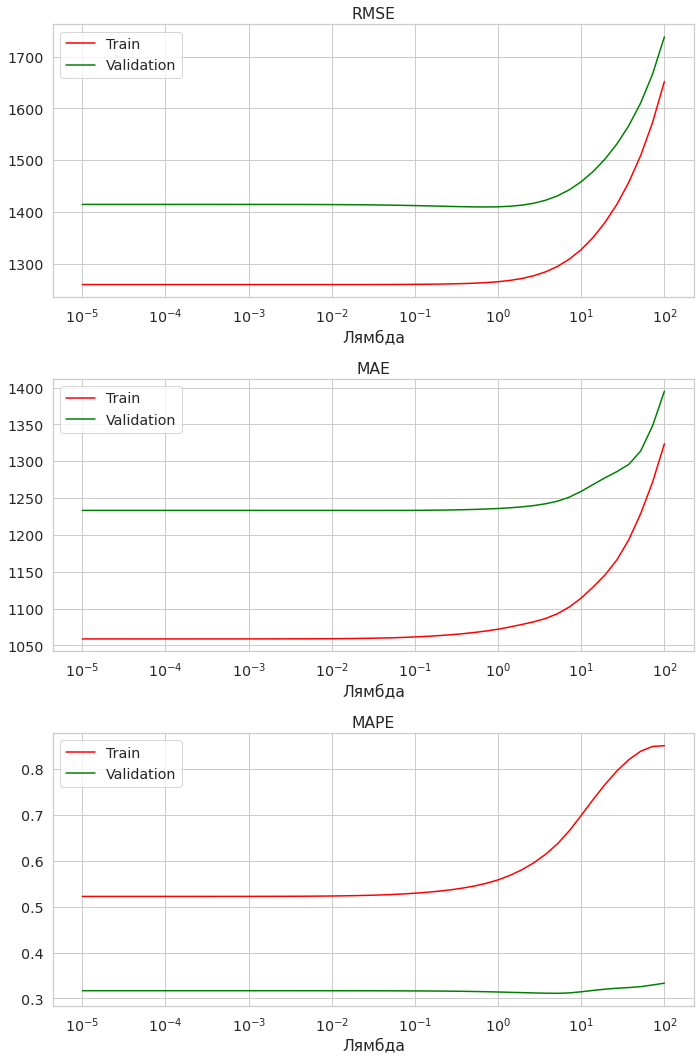

In [281]:
x = regs.keys()
plot = plt.figure(figsize=(10, 15))
ax1 = plot.add_subplot(311)
ax2 = plot.add_subplot(312)
ax3 = plot.add_subplot(313)
ax1.plot(x, list(train_err[:,0]), color='red', label = "Train")
ax1.plot(x, list(valid_err[:,0]), color='green', label = "Validation")
ax1.set(title = "RMSE")
ax1.set(xlabel = "Лямбда")
ax1.semilogx()
ax1.legend()
ax2.plot(x, list(train_err[:,1]), color='red', label = "Train")
ax2.plot(x, list(valid_err[:,1]), color='green', label = "Validation")
ax2.set(title = "MAE")
ax2.set(xlabel = "Лямбда")
ax2.semilogx()
ax2.legend()
ax3.plot(x, list(train_err[:,2]), color='red', label = "Train")
ax3.plot(x, list(valid_err[:,2]), color='green', label = "Validation")
ax3.set(xlabel = "Лямбда")
ax3.set(title = "MAPE")
ax3.semilogx()
ax3.legend()
plt.tight_layout()

Погрешности растут с ростом лямбды, на 3 графике, MAPE показывает, что процент погрешностей начал быстро расти на training дате, возможно из-за маленького знаменателя в формуле

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Для наглядности можно попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

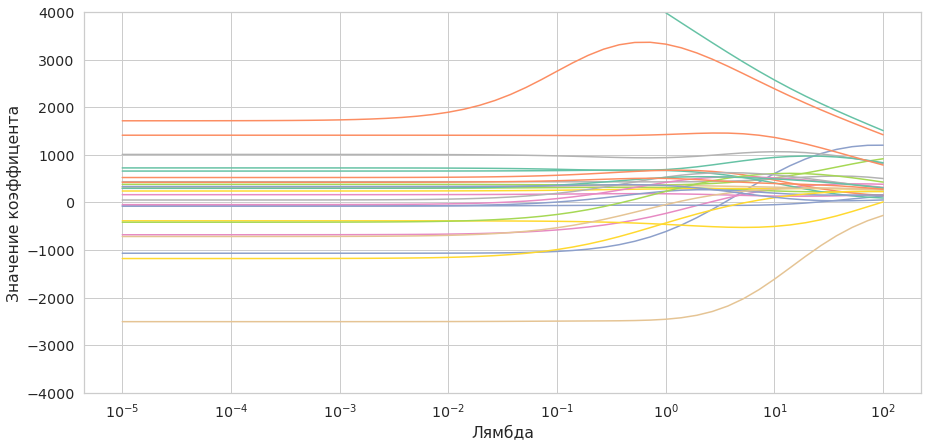

In [282]:
plt.figure(figsize = (15, 7))
plt.ylim(-4000, 4000)
plt.xscale('log')
k = []
for i in regs:
    k.append(regs[i].tetta)
k = np.array(k)
for i in range(k.shape[1]):
    plt.plot(x, k[:, i])
plt.xlabel("Лямбда")
plt.ylabel("Значение коэффицента")
plot.show()

Коэффиценты уменьшаются при увеличении лямбды и сходятся к нулю; при минимизации увеличение лямбды дает уменьшение коэффицентов, т.к. у них становится больше веса в сумме

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [284]:
test = test[test['hum'] > 0.25]
test = test[test['windspeed'] < 0.5]
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
test_cat = encoder.fit_transform(test[categorial_features])  # обучаем и кодируем
X_test = np.hstack([test[real_features], test_cat])
res = list(regs.values())[0].predict(X_test)
metrics.mean_squared_error(valid[target_feature], valid_preds) ** 0.5, \
metrics.mean_absolute_error(valid[target_feature], valid_preds), \
metrics.mean_absolute_percentage_error(valid[target_feature], valid_preds)

(1738.3278568910764, 1395.0222301906172, 0.3332945492577176)

Сделайте выводы.

При ridge-регрессии лямбда позволяет нам не заботится о необратимых матрицах, так как мы всегда можем увеличить лямбду и матрица будет выраждаться "меньше". Однако большая лямбда дает больше веса коэффицентам, и минимизация погрешности превращается в минимизацию коэффицентов, что пагубно влияет на итоговый результат. Нужно аккуратно подбирать лямбду, чтобы погрешность не увеличивалась из-за необратимой матрицы, и погрешности не были перевешены самой лямбдой.

### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

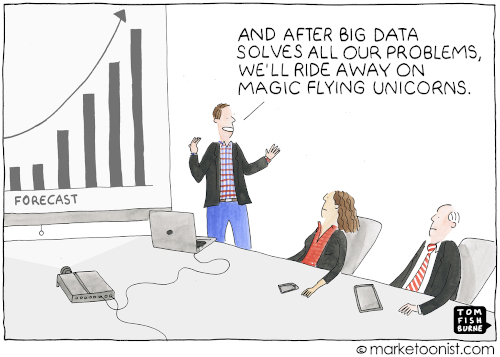

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру mini-batch стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча обычно берут кратно степени двойки, например, 128 или 256.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.